# Comment

This is the best we can do (I think) with ridge regression, jet division, and -999 to 0.

If we want to improve this result ve can try to: <br>
1) Remove outliers <br>
2) Remove highly correlated columns

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
import time 

#to keep things in order, and to avoid to copy and paste everytime our functions if we want to use them in more than one folder,
#we can temporarily use this library. 
import sys

#in this way Python will search the implementations also in the path '../HelperFunctions'
sys.path.insert(0, '../HelperFunctions')
sys.path.insert(0, '../pre-processing/Clean_Data/')

from proj1_helpers import *
from common_functions import *
from counters import *
from remove import *
from replace import *
from regressors import *
from CrossValidationFunctions import *

# Regression functions

In [2]:
from CrossValidationFunctions import *
def grid_search_hyperparam_with_CV(y, tx, lambdas, degrees):
    loss_tr = np.zeros((len(lambdas), len(degrees)))
    loss_te = np.zeros((len(lambdas), len(degrees)))
    accuracy = np.zeros((len(lambdas), len(degrees)))
    
    for idx_lambda, lambda_ in enumerate(lambdas):
        for idx_degree, degree in enumerate(degrees):
                        
            x_augmented = build_poly(tx, degree)
            
            #regression with your favourite method
            k_indices = build_k_indices(y, 4, 1)
            acc, loss1, loss2 = cross_validation_with_ridge(y, x_augmented, k_indices, lambda_)
            
            loss_tr[idx_lambda, idx_degree] = loss1
            loss_te[idx_lambda, idx_degree] = loss2
            accuracy[idx_lambda, idx_degree] = acc
    
    #find the best using the loss
    min_loss_te = np.min(loss_te)
    best_lambda_loss = lambdas[ np.where( loss_te == min_loss_te )[0] ]
    best_degree_loss = degrees[ np.where( loss_te == min_loss_te )[1] ]

    #recompute best w
    x_augmented = build_poly(tx, int(best_degree_loss))
    best_w_loss = ridge_regression(y,x_augmented,best_lambda_loss)
    
    #find the best using the accuracy
    max_acc = np.max(accuracy)
    best_lambda_acc = lambdas[ np.where( accuracy == max_acc )[0] ]
    best_degree_acc = degrees[ np.where( accuracy == max_acc )[1] ]
    
    #recompute best w
    x_augmented = build_poly(tx, int(best_degree_acc[0]))
    best_w_acc = ridge_regression(y,x_augmented,best_lambda_acc[0])

    return best_lambda_loss, best_degree_loss, best_w_loss, best_lambda_acc, best_degree_acc, best_w_acc, loss_tr, loss_te, accuracy


def grid_search_hyperparam_RIDGE(y, tx, lambdas, degrees):
    loss_tr = np.zeros((len(lambdas), len(degrees)))
    loss_te = np.zeros((len(lambdas), len(degrees)))
    
    seed = 1
    
    for idx_lambda, lambda_ in enumerate(lambdas):
        for idx_degree, degree in enumerate(degrees):
            
            x_augmented = build_poly(tx, degree)
            
            #regression with your favourite method
            x_tr, x_te, y_tr, y_te = split_data(x_augmented, y, 0.7, seed = seed)

            weights = ridge_regression(y_tr, x_tr, lambda_)

            rmse_tr= np.sqrt(2 * compute_loss_MSE(y_tr, x_tr, weights))
            rmse_vt= np.sqrt(2 * compute_loss_MSE(y_te, x_te, weights))
            loss_tr[idx_lambda, idx_degree] = rmse_tr
            loss_te[idx_lambda, idx_degree] = rmse_vt
        
    min_loss_te = np.min(loss_te)
    best_lambda = lambdas[ np.where( loss_te == min_loss_te )[0] ]
    best_degree = degrees[ np.where( loss_te == min_loss_te )[1] ]

    #recompute best w
    x_augmented = build_poly(tx, int(best_degree))
    best_w = ridge_regression(y,x_augmented,best_lambda)

    return best_lambda, best_degree, best_w, loss_tr, loss_te

# Load Data And Basic Preprocessing

In [3]:
yb, input_data, ids = load_csv_data("../data/train.csv", sub_sample=False)
_, test_data, ids_test = load_csv_data("../data/test.csv", sub_sample=False)

#this will surely be deleted, in this way we are sure that original_data is the original version of the data and we don't have
#to load them again
from copy import deepcopy
originalData = deepcopy(input_data)
originalY = deepcopy(yb)
originalTest = deepcopy(test_data)


In [4]:
#basic step
input_data = deepcopy(originalData)
numInvalidValues=countInvalid(input_data, -999)
idxCols = np.where(numInvalidValues>0)[0]
input_data = replaceWithZero(input_data,-999,idxCols)

# Jet division

In [5]:
# x0, x1, x2
idx0 = np.where(input_data[:,22]==0)
idx1 = np.where(input_data[:,22]==1)
idx2 = np.where(input_data[:,22]>=2)

x0, mean_train0, std_train0 = standardize ( input_data[idx0] )
x1, mean_train1, std_train1 = standardize ( input_data[idx1] )
x2, mean_train2, std_train2 = standardize ( input_data[idx2] )
y0 = yb[idx0]
y1 = yb[idx1]
y2 = yb[idx2]

Substitute 0 with 0.0001
Substitute 0 with 0.0001


# Regression with CV

In [ ]:
# lambdas = np.logspace(-6,0,15)
# degrees = np.arange(15)

# best_lambda_loss0, best_degree_loss0, best_w_loss0, best_lambda_acc0, best_degree_acc0, best_w_acc0, loss_tr0, loss_te0, accuracy0 = \
# grid_search_hyperparam_with_CV(y0, x0, lambdas, degrees)

# best_lambda_loss1, best_degree_loss1, best_w_loss1, best_lambda_acc1, best_degree_acc1, best_w_acc1, loss_tr1, loss_te1, accuracy1 = \
# grid_search_hyperparam_with_CV(y1, x1, lambdas, degrees)

# best_lambda_loss2, best_degree_loss2, best_w_loss2, best_lambda_acc2, best_degree_acc2, best_w_acc2, loss_tr2, loss_te2, accuracy2 = \
# grid_search_hyperparam_with_CV(y2, x2, lambdas, degrees)


In [ ]:
# print('LOSS')
# print(f'Model with 0 jets: lambda = {best_lambda_loss0}, degree = {best_degree_loss0}, loss = {np.min(loss_te0)}')
# print(f'Model with 1 jets: lambda = {best_lambda_loss1}, degree = {best_degree_loss1}, loss = {np.min(loss_te1)}')
# print(f'Model with more than 1 jets: lambda = {best_lambda_loss2}, degree = {best_degree_loss2}, loss = {np.min(loss_te2)}')

# print('\n\nACCURACY')
# print(f'Model with 0 jets: lambda = {best_lambda_acc0}, degree = {best_degree_acc0}, acc = {np.max(accuracy0)}')
# print(f'Model with 1 jets: lambda = {best_lambda_acc1}, degree = {best_degree_acc1}, acc = {np.max(accuracy1)}')
# print(f'Model with more than 1 jets: lambda = {best_lambda_acc2}, degree = {best_degree_acc2}, acc = {np.max(accuracy2)}')


# N0 = x0.shape[0]
# N1 = x1.shape[0]
# N2 = x2.shape[0]

# TOTAccuracy = ( N0*np.max(accuracy0) + N1*np.max(accuracy1) + N2*np.max(accuracy2) ) / ( N0 + N1 + N2 )
# print(f'\n\nOur test set reached an accuracy of: acc = {TOTAccuracy}')


# With CV, grid search more dense on the "good" zones

We can search for less degrees and less lambdas.. but nearer to the optimum value

In [6]:
lambdas0 = np.linspace(0.0001,0.01,15) #for the first subset the lambda is around 0.001
lambdas1 = np.linspace(0.00001,0.001,15) #for the second subset the lambda is around 0.0001
lambdas2 = np.linspace(0.00001,0.001,15) #for the third subset the lambda is around 0.0001

degrees = np.arange(7,17) #the best degree was high for all the models


best_lambda_loss0, best_degree_loss0, best_w_loss0, best_lambda_acc0, best_degree_acc0, best_w_acc0, loss_tr0, loss_te0, accuracy0 = \
grid_search_hyperparam_with_CV(y0, x0, lambdas0, degrees)

best_lambda_loss1, best_degree_loss1, best_w_loss1, best_lambda_acc1, best_degree_acc1, best_w_acc1, loss_tr1, loss_te1, accuracy1 = \
grid_search_hyperparam_with_CV(y1, x1, lambdas1, degrees)

best_lambda_loss2, best_degree_loss2, best_w_loss2, best_lambda_acc2, best_degree_acc2, best_w_acc2, loss_tr2, loss_te2, accuracy2 = \
grid_search_hyperparam_with_CV(y2, x2, lambdas2, degrees)

In [7]:
print('LOSS')
print(f'Model with 0 jets: lambda = {best_lambda_loss0}, degree = {best_degree_loss0}, loss = {np.min(loss_te0)}')
print(f'Model with 1 jets: lambda = {best_lambda_loss1}, degree = {best_degree_loss1}, loss = {np.min(loss_te1)}')
print(f'Model with more than 1 jets: lambda = {best_lambda_loss2}, degree = {best_degree_loss2}, loss = {np.min(loss_te2)}')

print('\n\nACCURACY')
print(f'Model with 0 jets: lambda = {best_lambda_acc0}, degree = {best_degree_acc0}, acc = {np.max(accuracy0)}')
print(f'Model with 1 jets: lambda = {best_lambda_acc1}, degree = {best_degree_acc1}, acc = {np.max(accuracy1)}')
print(f'Model with more than 1 jets: lambda = {best_lambda_acc2}, degree = {best_degree_acc2}, acc = {np.max(accuracy2)}')


N0 = x0.shape[0]
N1 = x1.shape[0]
N2 = x2.shape[0]

TOTAccuracy = ( N0*np.max(accuracy0) + N1*np.max(accuracy1) + N2*np.max(accuracy2) ) / ( N0 + N1 + N2 )
print(f'\n\nOur test set reached an accuracy of: acc = {TOTAccuracy}')

LOSS
Model with 0 jets: lambda = [0.00080714], degree = [7], loss = 23516865.010900464
Model with 1 jets: lambda = [1.e-05], degree = [7], loss = 1.6039097836141873
Model with more than 1 jets: lambda = [1.e-05], degree = [7], loss = 1.2586658386748233


ACCURACY
Model with 0 jets: lambda = [0.00080714], degree = [12], acc = 0.8427616302346064
Model with 1 jets: lambda = [0.00015143], degree = [12], acc = 0.8066517074177241
Model with more than 1 jets: lambda = [0.00015143], degree = [13], acc = 0.8325475599669148


Our test set reached an accuracy of: acc = 0.8285973616172405


Text(0.5,1,'Loss (in terms of accuracy)')

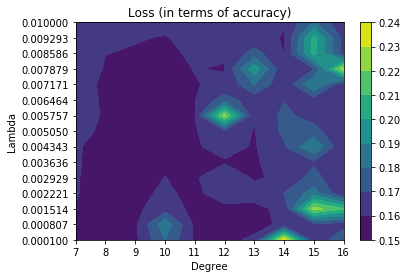

In [8]:
fig = plt.figure()
# Make data.
Y = lambdas0
X = degrees
X, Y = np.meshgrid(X, Y)
Z = 1 - accuracy0

# Plot the surface.
surf = plt.contourf(X, Y, Z)
plt.colorbar()
plt.yticks(lambdas0)
plt.xticks(degrees)
plt.ylabel('Lambda')
plt.xlabel('Degree')
plt.title('Loss (in terms of accuracy)')

# With ridge

In [ ]:
# lambdas = np.logspace(-6,0,15)
# degrees = np.arange(15)

# best_lambda0, best_degree0, best_w0, loss_tr0, loss_te0 = grid_search_hyperparam_RIDGE(y0, x0, lambdas, degrees)
# best_lambda1, best_degree1, best_w1, loss_tr1, loss_te1 = grid_search_hyperparam_RIDGE(y1, x1, lambdas, degrees)
# best_lambda2, best_degree2, best_w2, loss_tr2, loss_te2 = grid_search_hyperparam_RIDGE(y2, x2, lambdas, degrees)


# print(f'Model with 0 jets: lambda = {best_lambda0}, degree = {best_degree0}, loss = {np.min(loss_te0)}')
# print(f'Model with 1 jets: lambda = {best_lambda1}, degree = {best_degree1}, loss = {np.min(loss_te1)}')
# print(f'Model with more than 1 jets: lambda = {best_lambda2}, degree = {best_degree2}, loss = {np.min(loss_te2)}')

# Submission

In [10]:
test_data = deepcopy(originalTest)
num_tests = test_data.shape[0]

numInvalidValues=countInvalid(test_data, -999)
idxCols = np.where(numInvalidValues>0)[0]
input_data = replaceWithZero(test_data,-999,idxCols)

# x0, x1, x2
idx0 = np.where(test_data[:,22]==0)
idx1 = np.where(test_data[:,22]==1)
idx2 = np.where(test_data[:,22]>=2)

x0,_,_ = standardizeWithGivenParameters ( test_data[idx0], mean_train0, std_train0 )
x1,_,_ = standardizeWithGivenParameters ( test_data[idx1], mean_train1, std_train1 )
x2,_,_ = standardizeWithGivenParameters ( test_data[idx2], mean_train2, std_train2 )

x0 = build_poly(x0, int(best_degree_acc0[0]))
x1 = build_poly(x1, int(best_degree_acc1[0]))
x2 = build_poly(x2, int(best_degree_acc2[0]))

y_pred0 = predict_labels(best_w_acc0,x0)
y_pred1 = predict_labels(best_w_acc1,x1)
y_pred2 = predict_labels(best_w_acc2,x2)

y_pred = np.ones(num_tests)
y_pred[idx0] = y_pred0
y_pred[idx1] = y_pred1
y_pred[idx2] = y_pred2

create_csv_submission(ids_test, y_pred, '02_999to0JetDivision20DegreesHighDensityGridSearch.csv')